

# Time Series Analysis and Forecasting Climate Change: <br><br>          Earth Surface Temperature Data


<br>
<br>
<br>
<b> 
    We have chosen time series temperature forecasting as our topic for the final project to help predict future temperatures, something which is much needed in today's time. Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view. For our project, we have analysed a place in India called 'Pune', which also happens to be our hometown, to make predictions and eventually give our views about change in temperature and our views about it.
</b>

We have implemented the following models : <br>

* Persistance Model 
* Autoregression Model
* Moving Average
* ARIMA
* SARIMA

With more emphasis towards SARIMA as it defines every parameter to define our seasonal data.
    
   
**Contributions by:**<br>
Anurag Rachcha |
Gauri Verma |
Rohan Kapadnis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
#from pandas import TimeGrouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from pandas import Grouper

In [3]:
# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

In [4]:
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [5]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.07,1.74,Århus,Denmark,57.05N,10.33E
1,1743-12-01,nan,nan,Århus,Denmark,57.05N,10.33E
2,1744-01-01,nan,nan,Århus,Denmark,57.05N,10.33E
3,1744-02-01,nan,nan,Århus,Denmark,57.05N,10.33E
4,1744-03-01,nan,nan,Århus,Denmark,57.05N,10.33E


In [6]:
punecity = cities.loc[cities['City'] == 'Pune',['dt','City','AverageTemperature']]

In [7]:
punecity

,dt,City,AverageTemperature
6084690,1796-01-01,Pune,20.51
6084691,1796-02-01,Pune,22.48
6084692,1796-03-01,Pune,25.07
6084693,1796-04-01,Pune,28.76
6084694,1796-05-01,Pune,29.94
...,...,...,...
6087298,2013-05-01,Pune,31.02
6087299,2013-06-01,Pune,26.36
6087300,2013-07-01,Pune,24.15
6087301,2013-08-01,Pune,24.44


In [8]:
punecity.columns=['Date','City','Temp']

In [9]:
punecity = punecity.reindex(columns=['Date','Temp','City'])

In [10]:
punecity

,Date,Temp,City
6084690,1796-01-01,20.51,Pune
6084691,1796-02-01,22.48,Pune
6084692,1796-03-01,25.07,Pune
6084693,1796-04-01,28.76,Pune
6084694,1796-05-01,29.94,Pune
...,...,...,...
6087298,2013-05-01,31.02,Pune
6087299,2013-06-01,26.36,Pune
6087300,2013-07-01,24.15,Pune
6087301,2013-08-01,24.44,Pune


In [11]:
punecity['Date'] = pd.to_datetime(punecity['Date'])
punecity

,Date,Temp,City
6084690,1796-01-01,20.51,Pune
6084691,1796-02-01,22.48,Pune
6084692,1796-03-01,25.07,Pune
6084693,1796-04-01,28.76,Pune
6084694,1796-05-01,29.94,Pune
...,...,...,...
6087298,2013-05-01,31.02,Pune
6087299,2013-06-01,26.36,Pune
6087300,2013-07-01,24.15,Pune
6087301,2013-08-01,24.44,Pune


In [12]:
punecity.reset_index(drop=True, inplace=True)
punecity

,Date,Temp,City
0,1796-01-01,20.51,Pune
1,1796-02-01,22.48,Pune
2,1796-03-01,25.07,Pune
3,1796-04-01,28.76,Pune
4,1796-05-01,29.94,Pune
...,...,...,...
2608,2013-05-01,31.02,Pune
2609,2013-06-01,26.36,Pune
2610,2013-07-01,24.15,Pune
2611,2013-08-01,24.44,Pune


In [13]:
punecity.set_index('Date', inplace=True)

Taking only the necessary columns and setting the date as the index

In [14]:
punecity = punecity.loc['2000':'2013-01-01']
punecity

,Temp,City
Date,,
2000-01-01,21.62,Pune
2000-02-01,22.41,Pune
2000-03-01,25.77,Pune
2000-04-01,30.01,Pune
2000-05-01,29.43,Pune
...,...,...
2012-09-01,25.21,Pune
2012-10-01,25.09,Pune
2012-11-01,22.80,Pune


In [15]:
del punecity['City']

In [16]:
punecity1 = punecity.copy()

In [17]:
punecity1.head()

,Temp
Date,
2000-01-01,21.62
2000-02-01,22.41
2000-03-01,25.77
2000-04-01,30.01
2000-05-01,29.43


In [18]:
punecity1.index[:5]

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
punecity1.head().values

array([[21.62 ],
       [22.414],
       [25.775],
       [30.013],
       [29.434]])

In [20]:
punecity1.unstack().head()

      Date      
Temp  2000-01-01   21.62
      2000-02-01   22.41
      2000-03-01   25.77
      2000-04-01   30.01
      2000-05-01   29.43
dtype: float64

In [21]:
punecity1.unstack().head().values

array([21.62 , 22.414, 25.775, 30.013, 29.434])

In [22]:
s = pd.Series(punecity1.unstack().values, index=punecity1.index)

This is now a finally a Series representation of a Time-Series! <br>
Let's explore it a little before we move on to working on it

In [28]:
s.size

157

In [29]:
s.head()

Date
2000-01-01   21.62
2000-02-01   22.41
2000-03-01   25.77
2000-04-01   30.01
2000-05-01   29.43
dtype: float64

In [30]:
s.index[:5]

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [31]:
s.tail()

Date
2012-09-01   25.21
2012-10-01   25.09
2012-11-01   22.80
2012-12-01   21.75
2013-01-01   21.11
dtype: float64

In [32]:
s.describe()

count   157.00
mean     25.39
std       2.89
min      20.09
25%      23.57
50%      25.15
75%      27.20
max      31.70
dtype: float64

In [33]:
df = pd.DataFrame()
df['year'] = [s.index[i].year for i in range(len(s))]
df['month'] = [s.index[i].month for i in range(len(s))]
df['value'] = s.values.tolist()

# Understanding Features of Time Series

Time Series data must be re-framed as a supervised learning dataset before we can start using machine learning algorithms. There is no concept of input and output features in time series. Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps.

### 1) Lag 
Now we introduced lag, just as explained by professor in our first exposure to time series data. They are the classical way that time series forecasting problems are transformed into supervised learning problems. The simplest approach is to predict the value at the next time (t+1) given the value at the current time (t). 

In [56]:
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [57]:
df.head()

,t,t+1
0,nan,21.62
1,21.62,22.41
2,22.41,25.77
3,25.77,30.01
4,30.01,29.43


In [58]:
df.tail()

,t,t+1
152,25.04,25.21
153,25.21,25.09
154,25.09,22.80
155,22.80,21.75
156,21.75,21.11


### 2) Window
The addition of lag features is called the sliding window method, in this case with a window width of 1. It is as though we are sliding our focus along the time series for each observation with an interest in only what is within the window width. We can expand the window width and include more lagged features.

In [59]:
values = pd.DataFrame(s.values)
df = pd.concat([values.shift(3), values.shift(2), values.shift(1), values], axis=1)
df.columns = ['t-2', 't-1', 't', 't+1']

In [60]:
df.head()

,t-2,t-1,t,t+1
0,nan,nan,nan,21.62
1,nan,nan,21.62,22.41
2,nan,21.62,22.41,25.77
3,21.62,22.41,25.77,30.01
4,22.41,25.77,30.01,29.43


### 3) Rolling Window
A step beyond adding raw lagged values is to add a summary of the values at previous time steps. We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. Perhaps the most useful is the mean of the previous values, also called the **rolling mean**.

In [61]:
values = pd.DataFrame(s.values)
shifted = values.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

df = pd.concat([means, values], axis=1)
df.columns = ['mean(t-1,t)', 't+1']

In [62]:
df.head()

,"mean(t-1,t)",t+1
0,nan,21.62
1,nan,22.41
2,22.02,25.77
3,24.09,30.01
4,27.89,29.43


We will be proceeding to use a rolling window of width 3, hence the new dataframe would be,

In [63]:
values = pd.DataFrame(s.values)
width = 3
shifted = values.shift(width - 1)
window = shifted.rolling(window=width)

df = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df.columns = ['min', 'mean', 'max', 't+1']

In [64]:
df.head()

,min,mean,max,t+1
0,nan,nan,nan,21.62
1,nan,nan,nan,22.41
2,nan,nan,nan,25.77
3,nan,nan,nan,30.01
4,21.62,23.27,25.77,29.43


### 4) Expanding Window
We will finally be working on the type of window that may be useful includes all previous data in the series. This is called an expanding window and can help with keeping track of the bounds of observable data.

In [44]:
values = pd.DataFrame(s.values)
window = values.expanding()

df = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df.columns = ['min', 'mean', 'max', 't+1']

In [45]:
df.head()

,min,mean,max,t+1
0,21.62,21.62,21.62,21.62
1,21.62,22.02,22.41,22.41
2,21.62,23.27,25.77,25.77
3,21.62,24.96,30.01,30.01
4,21.62,25.85,30.01,29.43


# DATA VISUALIZATION

### 1) Line plot
Lineplot is the most suitably and extensively used visualization for time series data. Given that we are handling data that deals in average temperature for a place that is for multiple years, shows seasonality. It is why we are going for seasonal ARIMA for our most preferred model

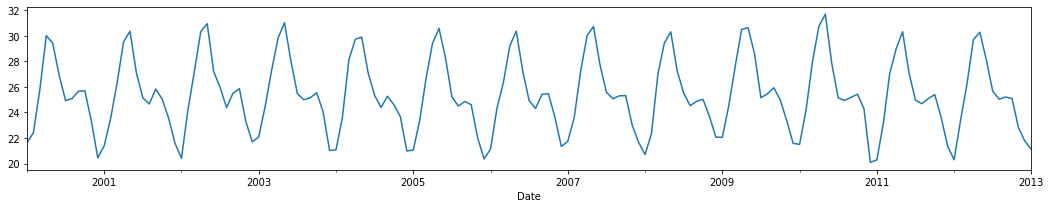

In [65]:
s.plot()

### 2) Histogram 
Another important visualization is of the distribution of observations themselves. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

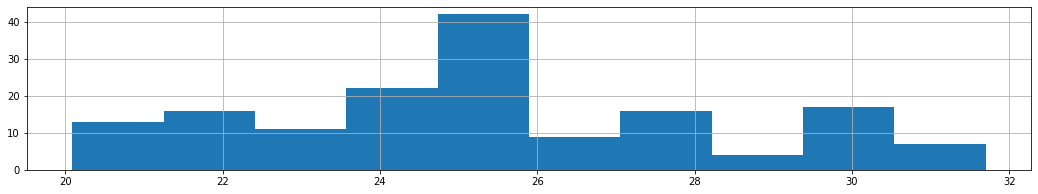

In [66]:
s.hist()

Histogram is the best way to tell us the most constant average temperature over the years, which for pune is somewhere around 25-26 degrees. This will also be our initial check before we run hypothesis tests on this by a choice of distribution

### 3) Kernel Density Estimation (KDE) Plot 
The kernel density estimation plot hints at us to use the normal distribution as our initial guess for tests.

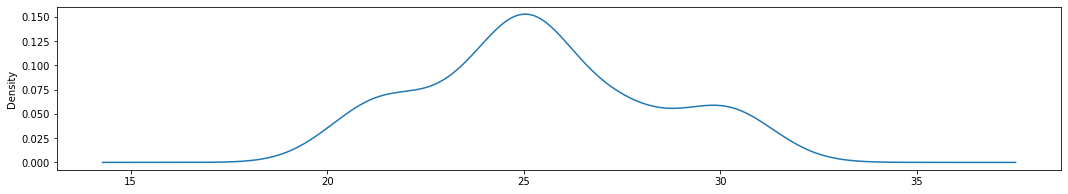

In [48]:
s.plot(kind='kde')

### 4) Box & Whisker Plots
To understand more about trends of data along a specific time period, we can make use of the boxplot. Using this, we can understand to what extents of values does our temperature stretch to beyond the 50th percentile

In [67]:
years, index = [], []
for name, gr in s.groupby(Grouper(freq='A')):
    years.append(gr.values)
    index.append(name.year)
df = pd.DataFrame(years, index=index, columns=range(1,13))

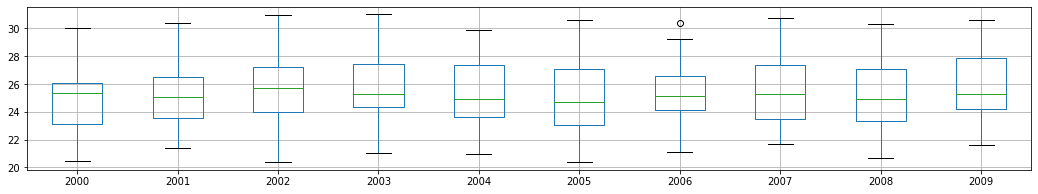

In [68]:
df.head(10).T.boxplot()

After this, we will also make some visualizations for the lags in data. As we create paired scatter plots for various lags in the data, we will subsequently move on to autocorrelation plots as well. 
As shown before in other notebooks, we did some transformation errors with the exponential smoothening so we will work on that from the basics again to kickstart forecasting using better models as well.

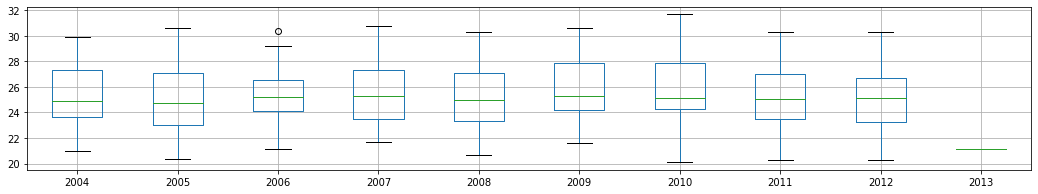

In [69]:
df.tail(10).T.boxplot()

### 5) Autocorrelation Plots
Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag=1, the observation at two time steps ago lag=2, and so on.

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called **autocorrelation** (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coeficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an **autocorrelation plot**.

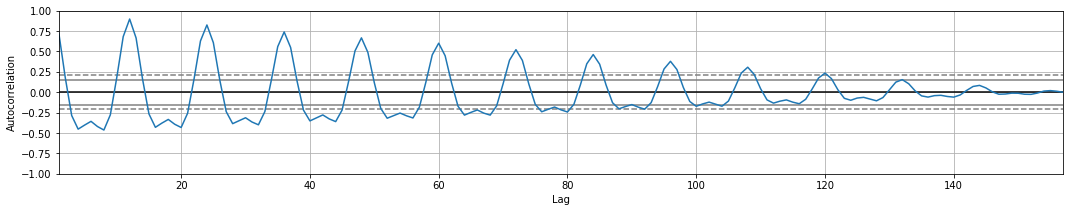

In [70]:
# create an autocorrelation plot
autocorrelation_plot(s)

The Statsmodels library also provides a version of the autocorrelation plot as a line plot. Plots lags on the horizontal and the correlations on vertical axis.

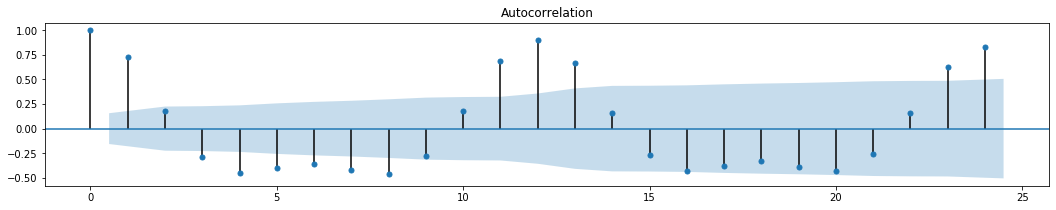

In [75]:
plot_acf(s, lags=24)
plt.show()

# Naïve (Moving Average) Smoothing :

We have implemented moving average and smoothening as per reasons: <br>
Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions. Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.

In [76]:
# tail-rolling average transform
rolling = s.rolling(window=3)
rolling_mean = rolling.mean()

In [77]:
rolling_mean.head(10)

Date
2000-01-01     nan
2000-02-01     nan
2000-03-01   23.27
2000-04-01   26.07
2000-05-01   28.41
2000-06-01   28.79
2000-07-01   27.09
2000-08-01   25.64
2000-09-01   25.23
2000-10-01   25.48
dtype: float64

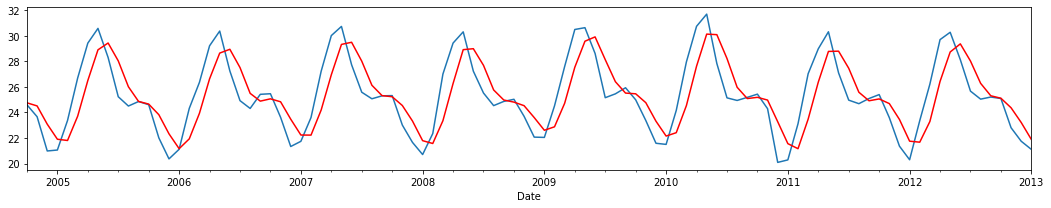

In [78]:
# plot original and transformed dataset
s[-100:].plot()
rolling_mean[-100:].plot(color='red')

# Moving Average(MA) for Predictions

The moving average value can also be used directly to make predictions. 

It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. Hence, we have done it before studying stationarity

The moving average model for predictions can easily be used in a walk-forward manner. 

In [79]:
# prepare problem
X = s.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = np.sqrt(mean_squared_error(test, predictions))

In [80]:
print('RMSE: %.3f' % rmse)

RMSE: 3.248


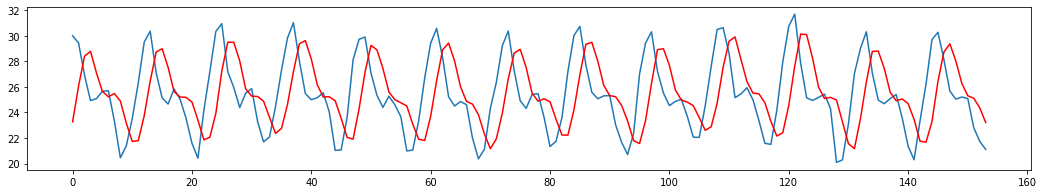

In [56]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Stationarity in Time Series Data


To create a time series forecast, the series must be stationary (constant mean, variance and autocorrelation).

One way to check if the series is stationary is using the adfuller function, if the P-Value is lower than 5% (usual number used for this kind of study) the series is stationary and you can start creating your model.

If the series isn't stationary you can do some data transformation like using natural logarithm, deflation, differencing, etc.

Our time series contains a trend. A trend is a continued increase or decrease in the series over time. There can be benefit in identifying, modeling, and even removing trend information from your time series dataset.

### ADFuller Function

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

In [207]:
X = s
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key] = value.round(4)
    
print(dfoutput)  

Results of Dickey-Fuller Test
Test Statistics             -2.37
p-value                      0.15
#lags used                  13.00
no. of observations used   143.00
Critical Value(1%)          -3.48
Critical Value(5%)          -2.88
Critical Value(10%)         -2.58
dtype: float64


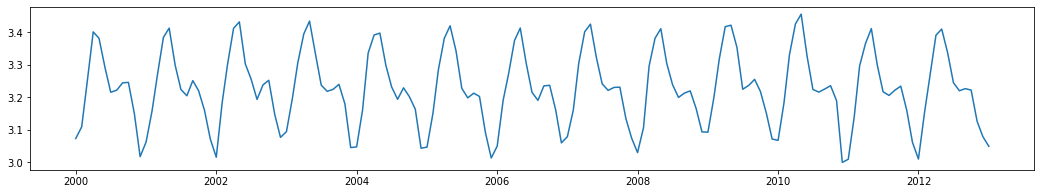

In [85]:
XLog1 = np.log(X)
plt.plot(XLog1)

In [86]:
XsmovingAverage = XLog1.rolling(window =3).mean()
XMA1 = XLog1 - XsmovingAverage
XMA1.dropna(inplace = True)
XMA1

Date
2000-03-01    0.11
2000-04-01    0.15
2000-05-01    0.04
2000-06-01   -0.07
2000-07-01   -0.08
              ... 
2012-09-01   -0.00
2012-10-01   -0.00
2012-11-01   -0.07
2012-12-01   -0.06
2013-01-01   -0.04
Length: 155, dtype: float64

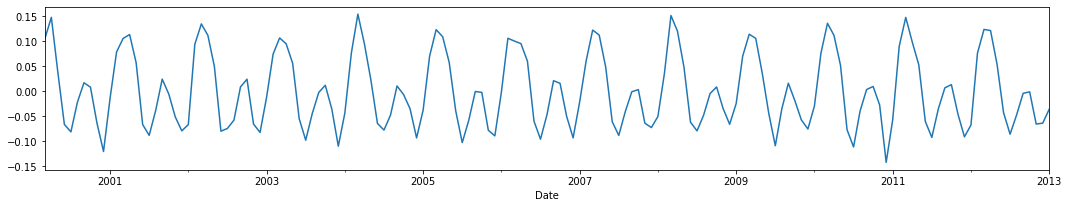

In [87]:
XMA1.plot()

In [90]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest = adfuller(XMA1, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key] = value
    
print(dfoutput) 

Results of Dickey-Fuller Test
Test Statistics             -4.82
p-value                      0.00
#lags used                  12.00
no. of observations used   142.00
Critical Value(1%)          -3.48
Critical Value(5%)          -2.88
Critical Value(10%)         -2.58
dtype: float64


The test statistics for the test is **-4.82** which is smaller than the critical value(5%) whose calculated value is at **-2.88**, suggesting us that we can reject the null hypothesis with a significance level less than **5%**. 

We can move ahead with our modelling!

# Model Evaluation

### Splits demonstration before model evaluation in Time Series

In time series forecasting, this evaluation of models on historical data is called backtesting. We will look at three different methods that you can use to backtest your machine learning models on time series problems:

* **Train-Test split** that respects temporal order of observations.<br>
* **Multiple Train-Test** splits that respect temporal order of observations. (Using scikit-learn TimeSeriesSplit)

### (a) Train-Test Split

In [91]:
#X = s.values
finalXMA = XMA1.values
train_size = int(len(finalXMA) * 0.66)
train, test = finalXMA[0:train_size],finalXMA[train_size:len(finalXMA)]

In [92]:
print('Observations: %d' % (len(finalXMA)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 155
Training Observations: 102
Testing Observations: 53


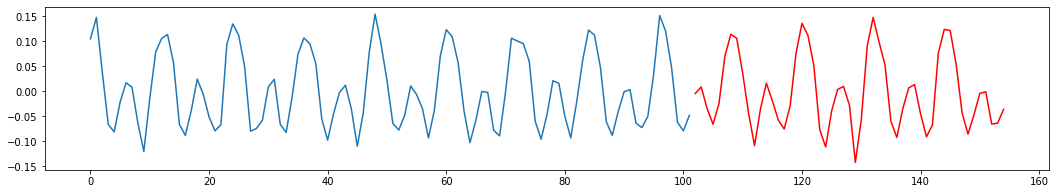

In [93]:
# plot train-test split of time series data
plt.plot(train)
plt.plot([None for i in train] + [x for x in test], color='r')

### (b) Multiple Train Test Splits

This will require multiple models to be trained and evaluated, but this additional computational expense will provide a more robust estimate of the expected performance of the chosen method and configuration on unseen data.

Observations: 79
Training Observations: 41
Testing Observations: 38
-----
Observations: 117
Training Observations: 79
Testing Observations: 38
-----
Observations: 155
Training Observations: 117
Testing Observations: 38
-----


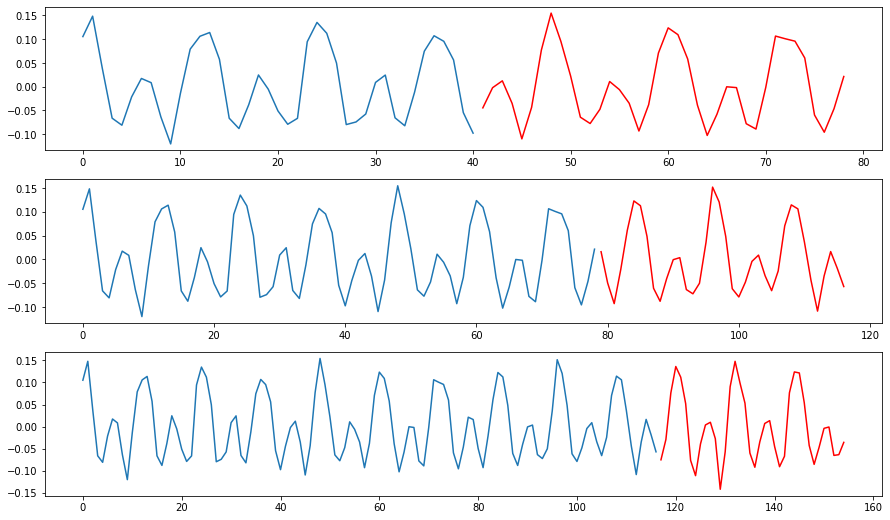

In [94]:
Xs = XMA1.values
splits = TimeSeriesSplit(n_splits=3)
index = 1
plt.figure(1, figsize=(15,9))

for train_index, test_index in splits.split(Xs):
    train = Xs[train_index]
    test = Xs[test_index]

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d\n-----' % (len(test)))

    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test], color='r')
    index += 1
plt.show() 

# 1) Prediction using Persistence model 

Having a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem. So we will develop a persistence forecast that we can use later as a baseline level of performance on this time series dataset.

The following steps will be implemented:

* Transform the univariate dataset into a supervised learning problem.
* Establish the train and test datasets for the test harness.
* Define the persistence model.
* Make a forecast and establish a baseline performance.
* Review the complete example and plot the output.

In [95]:
# Create lagged dataset
values = pd.DataFrame(XMA1.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [96]:
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [97]:
# persistence model
def model_persistence(x):
    return x

In [98]:
# walk-forward validation
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))

In [99]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.063


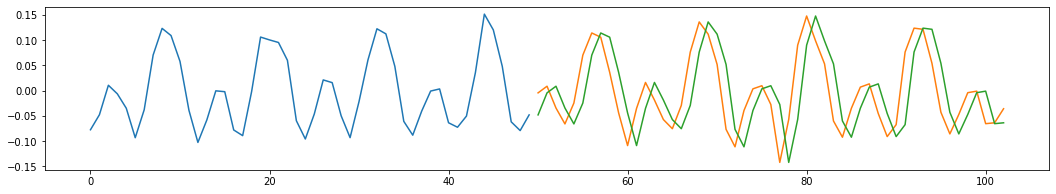

In [125]:
# plot predictions and expected results on the test data
plt.plot(train_y[-50:])
plt.plot([None for i in train_y[-50:]] + [x for x in test_y])
plt.plot([None for i in train_y[-50:]] + [x for x in predictions])

### Residuals in Forecasting & it's visualizations

A residual error is calculated as the expected outcome minus the forecast. Careful exploration of residual errors on your time series prediction problem can tell you a lot about your forecast model and even suggest improvements.

In [100]:
# calculate residuals from the above persistence model
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

The first plot is to look at the residual forecast errors over time as a line plot. We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure.

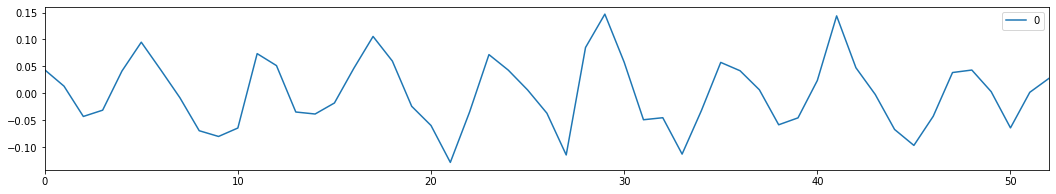

In [101]:
# plot residuals
residuals.plot()

We can calculate summary statistics on the residual errors. Mainly, we are interested in the mean value of the residual errors. <br>
A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

In [102]:
residuals.describe()

,0
count,53.00
mean,0.00
std,0.06
min,-0.13
25%,-0.05
50%,0.00
75%,0.04
max,0.15


Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE24AC24C8>]],
      dtype=object)

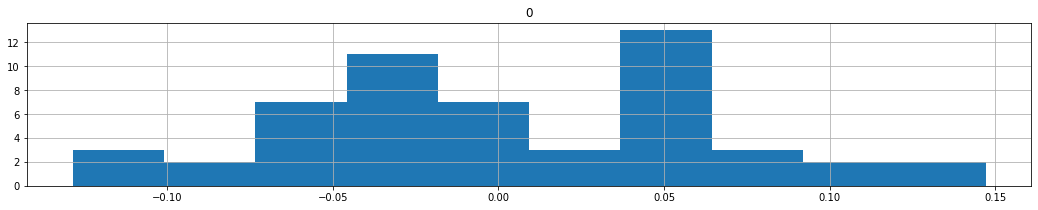

In [103]:
residuals.hist()

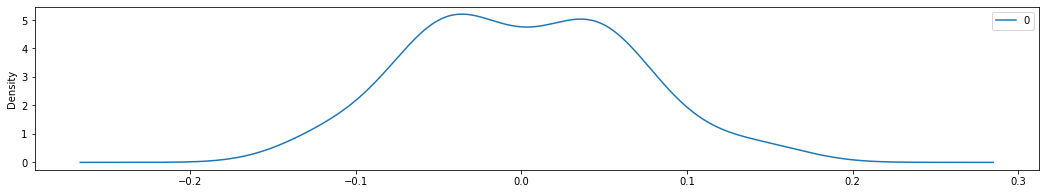

In [104]:
residuals.plot(kind='kde')

### Q-Q plot
The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

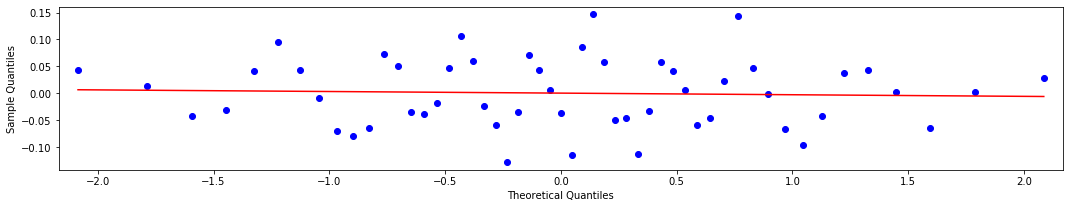

In [105]:
qqplot(residuals, line='r')
plt.show()

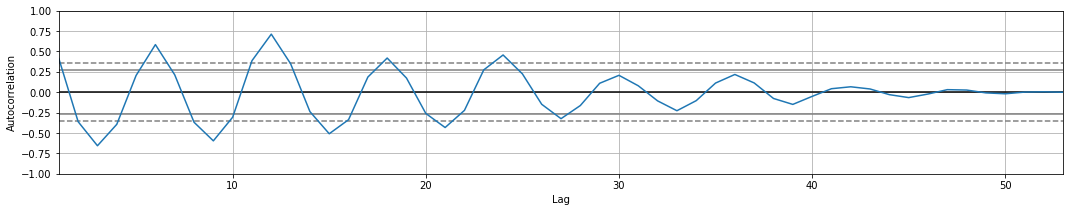

In [106]:
autocorrelation_plot(residuals)

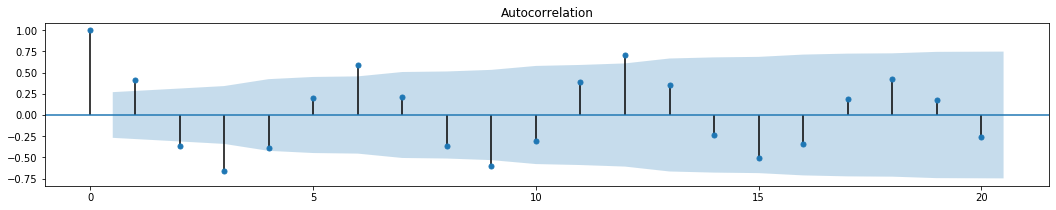

In [107]:
plot_acf(residuals, lags=20)
plt.show()

Not significant, but still a decent amount of autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called **autoregression**.

But before we move ahead,

# BONUS BONUS BONUS !!!

We want to show 2 ways we came across that can both simplify the prediction problem and potentially expose more or different information to be modeled.<br> A reframing can ultimately result in better and/or more robust forecasts.

### (a) Classification Framings :

Classification involves predicting categorical or label outputs (such as high, medium, and low). For example, we can forecast whether a change in minimum value will be small or large, or whether the new value will be lower or higher than the current value.

In [109]:
# Create lagged dataset
values = pd.DataFrame(XMA1.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [110]:
def make_discrete(row):
   if row['t+1'] < 0:
      return 'low'
   elif row['t+1'] > 3:
      return 'high'
   else:
      return 'medium'

In [111]:
df['t+1'] = df.apply(lambda row: make_discrete(row), axis=1)

In [112]:
# Randomly sample 10 elements from the dataframe
df.sample(n=10)

,t,t+1
39,0.06,low
139,0.01,medium
64,-0.04,low
98,0.12,medium
53,-0.08,low
27,0.05,low
56,-0.01,low
116,-0.02,low
82,-0.09,low
72,0.11,medium


### (b) Time Horizon Framings

* Forecast the minimum value for the next 3 months.
* Forecast the maximum value relative to the average from the past 12 months.
* Forecast the month in the next year that will have the lowest value.

In [115]:
# create lagged dataset
values = pd.DataFrame(XMA1.values)
df = pd.concat([values.shift(1), values, values.shift(-1), values.shift(-2)], axis=1)
df.columns = ['t', 't+1', 't+2', 't+3']

In [116]:
df.head()

,t,t+1,t+2,t+3
0,nan,0.11,0.15,0.04
1,0.11,0.15,0.04,-0.07
2,0.15,0.04,-0.07,-0.08
3,0.04,-0.07,-0.08,-0.02
4,-0.07,-0.08,-0.02,0.02


# 2) Prediction using Autoregression Model

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.

In [117]:
# split dataset
X = XMA1.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

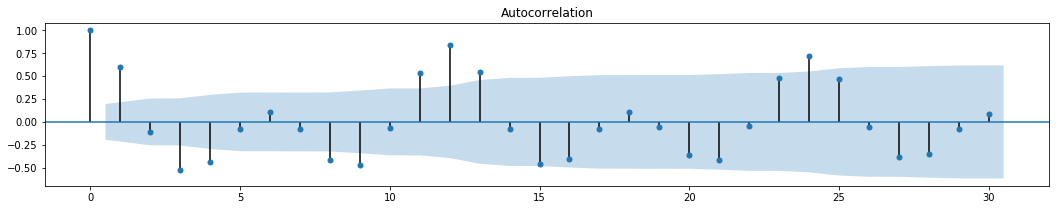

In [118]:
plot_acf(train, lags=30)
plt.show()

We will use the **Statsmodels** library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model.

In [119]:
# train autoregression
model = AR(train)
model_fit = model.fit()

In [120]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 12
Coefficients: [-1.13275970e-04 -5.57525681e-02 -5.95373938e-01 -3.65156854e-01
 -4.75696464e-01 -3.74393168e-01 -4.92186382e-01 -3.37477651e-01
 -4.45262523e-01 -5.31036292e-01 -3.24989356e-01 -2.77492454e-01
  1.80850785e-01]


In [121]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [122]:
test_period = 7
for i in range(test_period):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test[:test_period], predictions[:test_period]))

predicted=-0.002510, expected=-0.004266
predicted=0.010548, expected=0.008902
predicted=-0.047231, expected=-0.034250
predicted=-0.081491, expected=-0.065747
predicted=-0.046356, expected=-0.024418
predicted=0.041408, expected=0.070488
predicted=0.137038, expected=0.114373


In [124]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.018


Yay! Autorgressor made better predictions!

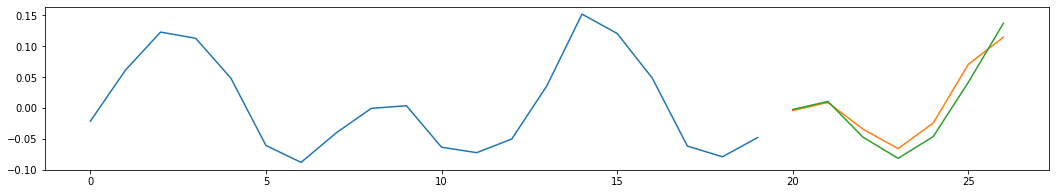

In [125]:
# plot predictions and expected results on the test data
plt.plot(train_y[-20:])
plt.plot([None for i in train_y[-20:]] + [x for x in test_y[:test_period]])
plt.plot([None for i in train_y[-20:]] + [x for x in predictions[:test_period]])

### Why Autoregression performed better?

In [127]:
values = pd.DataFrame(XMA1.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [128]:
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [129]:
predictions = [x for x in test_X]

In [130]:
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.063


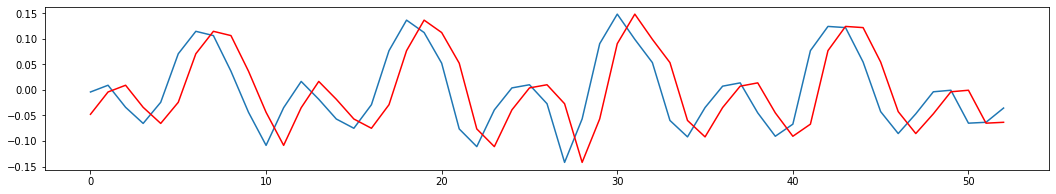

In [131]:
plt.plot(test_y)
plt.plot(predictions, color='red')

# 3) Predictions using Moving Average Model

Predictions can also be made from the residual errors which can act like another source of information which we will now model. These residuals too come with a temporal structure, as shown in one of the visualizations above. Using an **autoregression** model on this can help improve the forecasts. 

In [132]:
values = pd.DataFrame(XMA1.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [133]:
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [134]:
train_pred = [x for x in train_X]

In [135]:
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

In [136]:
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [137]:
print('Lag=%d, Coef=%s' % (window, coef))

Lag=12, Coef=[-3.19727680e-04 -8.38145971e-01 -1.09117062e+00 -1.04040330e+00
 -1.07598318e+00 -1.01354644e+00 -1.10654362e+00 -9.97934499e-01
 -1.03442485e+00 -1.13108131e+00 -1.03333953e+00 -8.37736863e-01
 -3.64517503e-01]


Autoregressor has again suggested that we require residual error of **12** previous time steps! We will use this value to calculate actual residual error and update the residual error time series lag values

In [139]:
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions, expected_error = [], []

for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]

    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)

This is a special function, we needed quite a few references for this! This is a model that will predict a time series from residual forecast error in training data against the predicted residual error on test data! Let's plot this

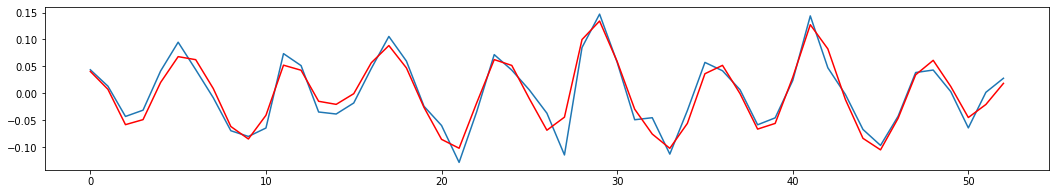

In [140]:
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

Fits very well! 

We will use this to make better predictions! Let's do that by adding the expected forecast erroe to a prediction to correct it and improve the model

In [144]:
values = pd.DataFrame(XMA1.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

In [145]:
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [146]:
train_pred = [x for x in train_X]

In [147]:
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

In [148]:
model = AR(train_resid)
model_fit = model.fit()

window = model_fit.k_ar
coef = model_fit.params

In [149]:
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]

    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    #print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error
rmse = np.sqrt(mean_squared_error(test_y, predictions))

In [150]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.019


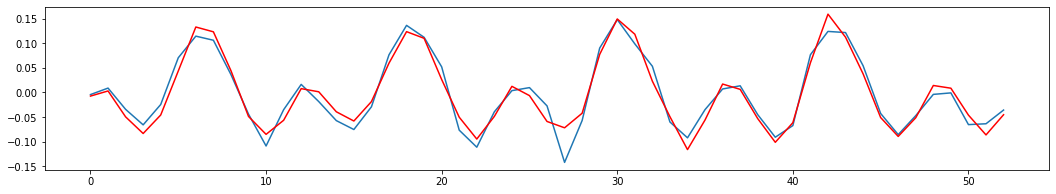

In [151]:
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')

# 4) Predictions using ARIMA Model

The **AutoRegressive Integrated Moving Average** Model, or ARIMA for short is a standard statistical model for time series forecast and analysis. An ARIMA model is a class of statistical model for analyzing and forecasting time series data.


* **AR**: AutoRegression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* **I**: Integrated. The use of differencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* **MA**: Moving Average. A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.
<br>
<br>
The parameters of the ARIMA model are defined as follows:
<br>
<br>
* **p**: The number of lag observations included in the model, also called the lag order.
* **d**: The number of times that the raw observations are differenced, also called the degree of differencing.
* **q**: The size of the moving average window, also called the order of moving average.


In [166]:
# fit model
model = ARIMA(XMA1, order=(2,1,0))
model_fit = model.fit(disp=0)

In [167]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  154
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 260.668
Method:                       css-mle   S.D. of innovations              0.044
Date:                Wed, 22 Apr 2020   AIC                           -513.336
Time:                        19:54:41   BIC                           -501.188
Sample:                    04-01-2000   HQIC                          -508.401
                         - 01-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.004     -0.112      0.911      -0.008       0.007
ar.L1.D.y      0.6929      0.062     11.235      0.000       0.572       0.814
ar.L2.D.y     -0.6514      0.061    -10.596      0.0

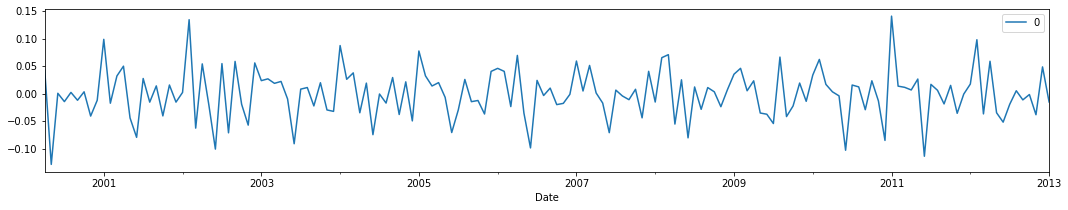

In [168]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

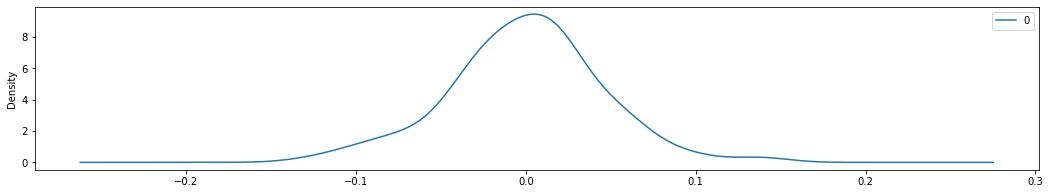

In [169]:
# density plot of residuals
residuals.plot(kind='kde')

[(-2, 2)]

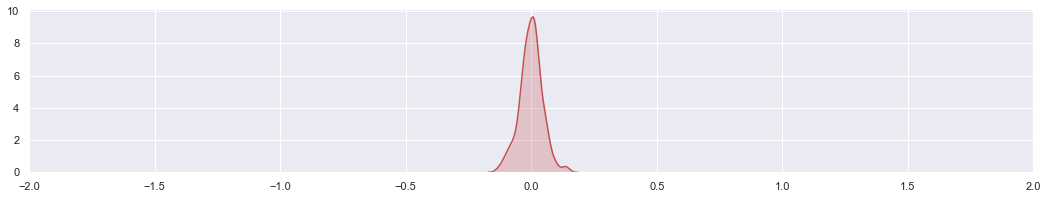

In [170]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals.values), shade=True, color="r").set(xlim=(-2, 2))

In [171]:
residuals.describe()

,0
count,154.00
mean,-0.00
std,0.05
min,-0.13
25%,-0.03
50%,0.00
75%,0.02
max,0.14


# Forecasting ......

We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

In [172]:
# split into train and test sets
X = XMA1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received. We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

In [173]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

We can calculate a final root mean squared error score (RMSE) for the predictions, providing a point of comparison for other ARIMA configurations.

In [174]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.044


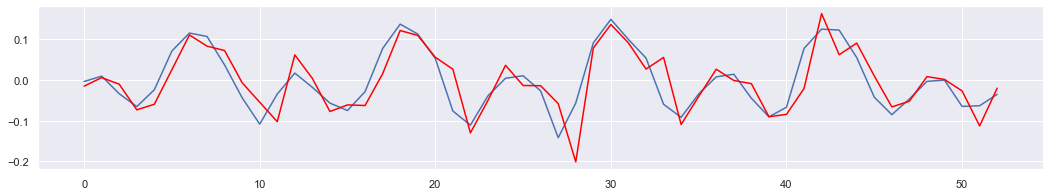

In [175]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test)
plt.plot(predictions, color='red')

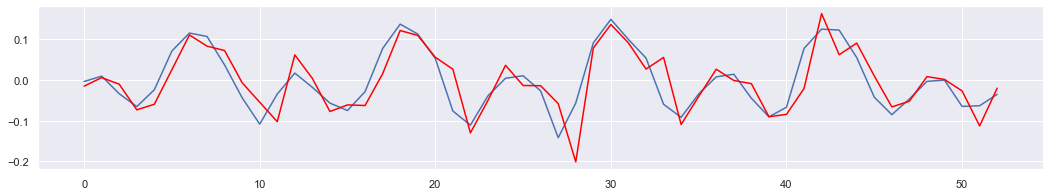

In [176]:
# zoom plot
plt.plot(test_y[-100:])
plt.plot(predictions[-100:], color='red')
plt.show()

**And for a grand finish,**

# 5) PREDICTION USING SARIMA MODEL :

We are taking the data for pune to run sarima again as we chose to take some more data into consideration to very significantly show the seasonal behaviour of our data! 

Below is again some EDA, which you may skip.

In [177]:
sarimapune = cities.loc[cities['City'] == 'Pune',['dt','AverageTemperature']]

In [178]:
sarimapune

,dt,AverageTemperature
6084690,1796-01-01,20.51
6084691,1796-02-01,22.48
6084692,1796-03-01,25.07
6084693,1796-04-01,28.76
6084694,1796-05-01,29.94
...,...,...
6087298,2013-05-01,31.02
6087299,2013-06-01,26.36
6087300,2013-07-01,24.15
6087301,2013-08-01,24.44


In [179]:
sarimapune.columns=['Date','Temp']
sarimapune['Date'] = pd.to_datetime(sarimapune['Date'])
sarimapune.reset_index(drop=True, inplace=True)
sarimapune.set_index('Date', inplace=True)
sarimapune = sarimapune.loc['1900':'2013-01-01']

In [180]:
sarimapune

,Temp
Date,
1900-01-01,21.30
1900-02-01,23.52
1900-03-01,26.98
1900-04-01,29.55
1900-05-01,30.31
...,...
2012-09-01,25.21
2012-10-01,25.09
2012-11-01,22.80


In [181]:
sarimapune = sarimapune.asfreq('M', method='bfill')

In [182]:
sarimapune

,Temp
Date,
1900-01-31,23.52
1900-02-28,26.98
1900-03-31,29.55
1900-04-30,30.31
1900-05-31,28.36
...,...
2012-08-31,25.21
2012-09-30,25.09
2012-10-31,22.80


In [183]:
sarimapune.isnull().sum()

Temp    0
dtype: int64

In [184]:
sarimapune.head()
len(sarimapune)

1356

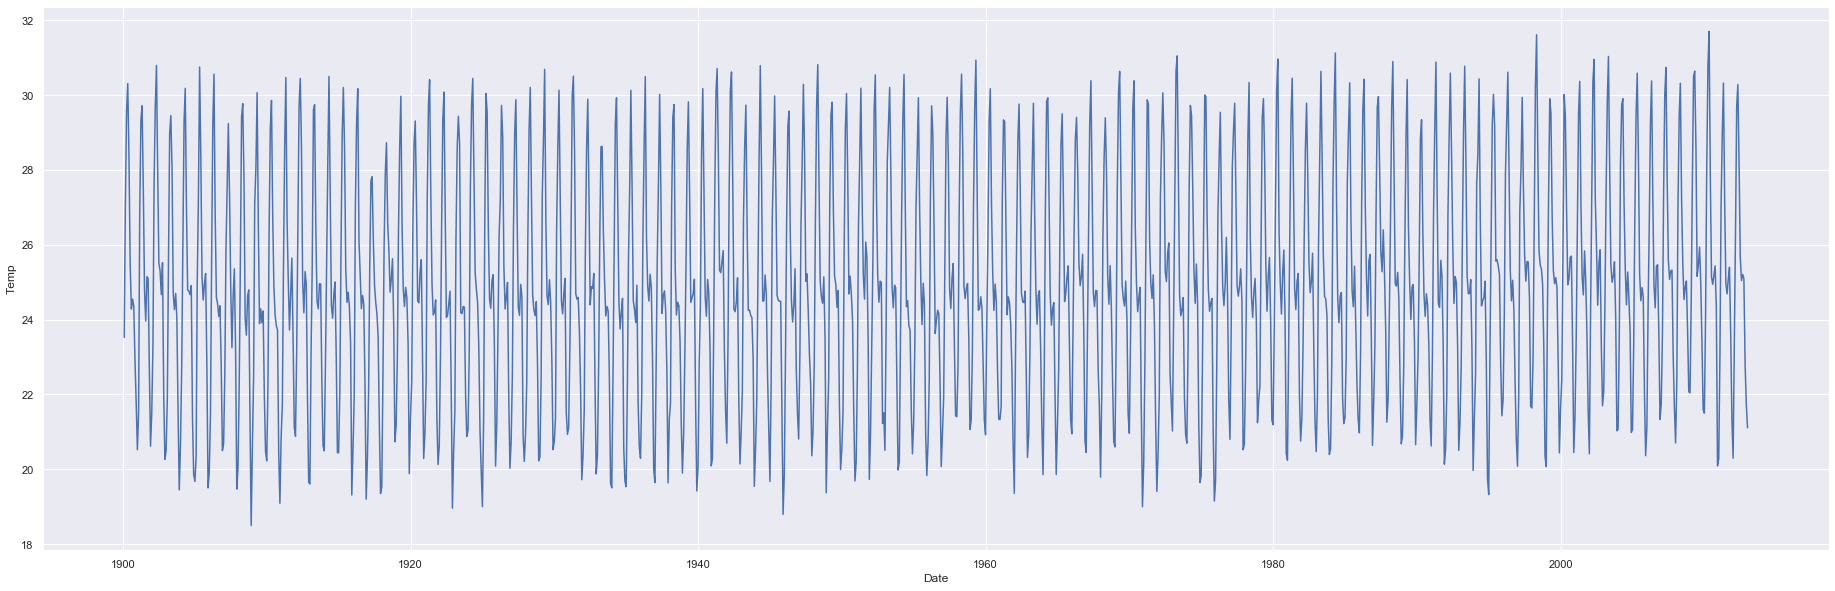

In [185]:
plt.figure(figsize=(32,10))
sns.lineplot(x=sarimapune.index, y=sarimapune['Temp'])
plt.show()

Observing the lower and upper limit of the lineplot tells us the reach of the temperature i.e. the temperature variation for pune. It is notable to see that over the centuries too, there haven't been significant changes in the temperature

In [186]:
sarimapune['Month'] = sarimapune.index.month
sarimapune['Year'] = sarimapune.index.year
sarimapune

,Temp,Month,Year
Date,,,
1900-01-31,23.52,1,1900
1900-02-28,26.98,2,1900
1900-03-31,29.55,3,1900
1900-04-30,30.31,4,1900
1900-05-31,28.36,5,1900
...,...,...,...
2012-08-31,25.21,8,2012
2012-09-30,25.09,9,2012
2012-10-31,22.80,10,2012


In [187]:
sarimapunepivot = pd.pivot_table(sarimapune, values='Temp', index='Month', columns='Year', aggfunc='mean')

In [188]:
sarimapunepivot

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Month,,,,,,,,,,,,,,,,,,,,,
1,23.52,21.53,23.36,21.91,22.73,20.32,21.48,22.61,22.22,22.47,...,24.48,23.62,23.37,24.32,23.61,22.35,24.52,24.16,23.11,23.36
2,26.98,26.82,27.62,25.44,26.03,24.94,25.43,25.82,25.46,27.09,...,27.29,28.13,26.70,26.36,27.23,27.01,27.60,27.96,27.04,26.22
3,29.55,29.34,29.69,28.98,29.29,27.30,29.21,27.52,29.42,28.11,...,29.82,29.73,29.43,29.22,30.02,29.43,30.50,30.75,28.99,29.70
4,30.31,29.71,30.79,29.45,30.18,30.75,30.56,29.24,29.77,30.07,...,31.03,29.90,30.58,30.38,30.74,30.31,30.64,31.70,30.32,30.28
5,28.36,27.47,27.93,28.01,26.97,28.30,26.78,27.29,27.77,26.51,...,28.03,27.08,28.30,27.25,27.73,27.23,28.62,27.83,27.10,28.13
6,25.52,24.79,25.51,24.69,24.79,25.13,24.61,24.84,24.04,23.89,...,25.48,25.34,25.23,24.93,25.59,25.52,25.16,25.14,24.96,25.67
7,24.28,23.96,25.30,24.27,24.76,24.52,24.42,23.25,23.58,24.29,...,25.00,24.39,24.50,24.32,25.07,24.54,25.46,24.94,24.69,25.04
8,24.55,25.15,24.67,24.70,24.67,24.97,24.09,24.65,24.63,23.91,...,25.16,25.27,24.86,25.42,25.30,24.86,25.94,25.18,25.09,25.21
9,24.36,25.10,25.52,24.02,24.91,25.23,24.37,25.36,24.79,24.23,...,25.54,24.60,24.61,25.47,25.32,25.03,24.99,25.43,25.40,25.09


The figure below is a plot for monthly temperatures through the years that have been chosen. <br>
Pune's temperature experiences a **(a)spring** like temperature towards the early months of the year followed by a scorching **(b)summer** during the period of mid-march through to the end of May. Post summer is the **(c)monsoon** season which lowers down and runs a consistent temperature as Pune experiences continuous showers. Lastly, there comes the winter that drastically drives down the temperature given the altitude positioning of Pune.

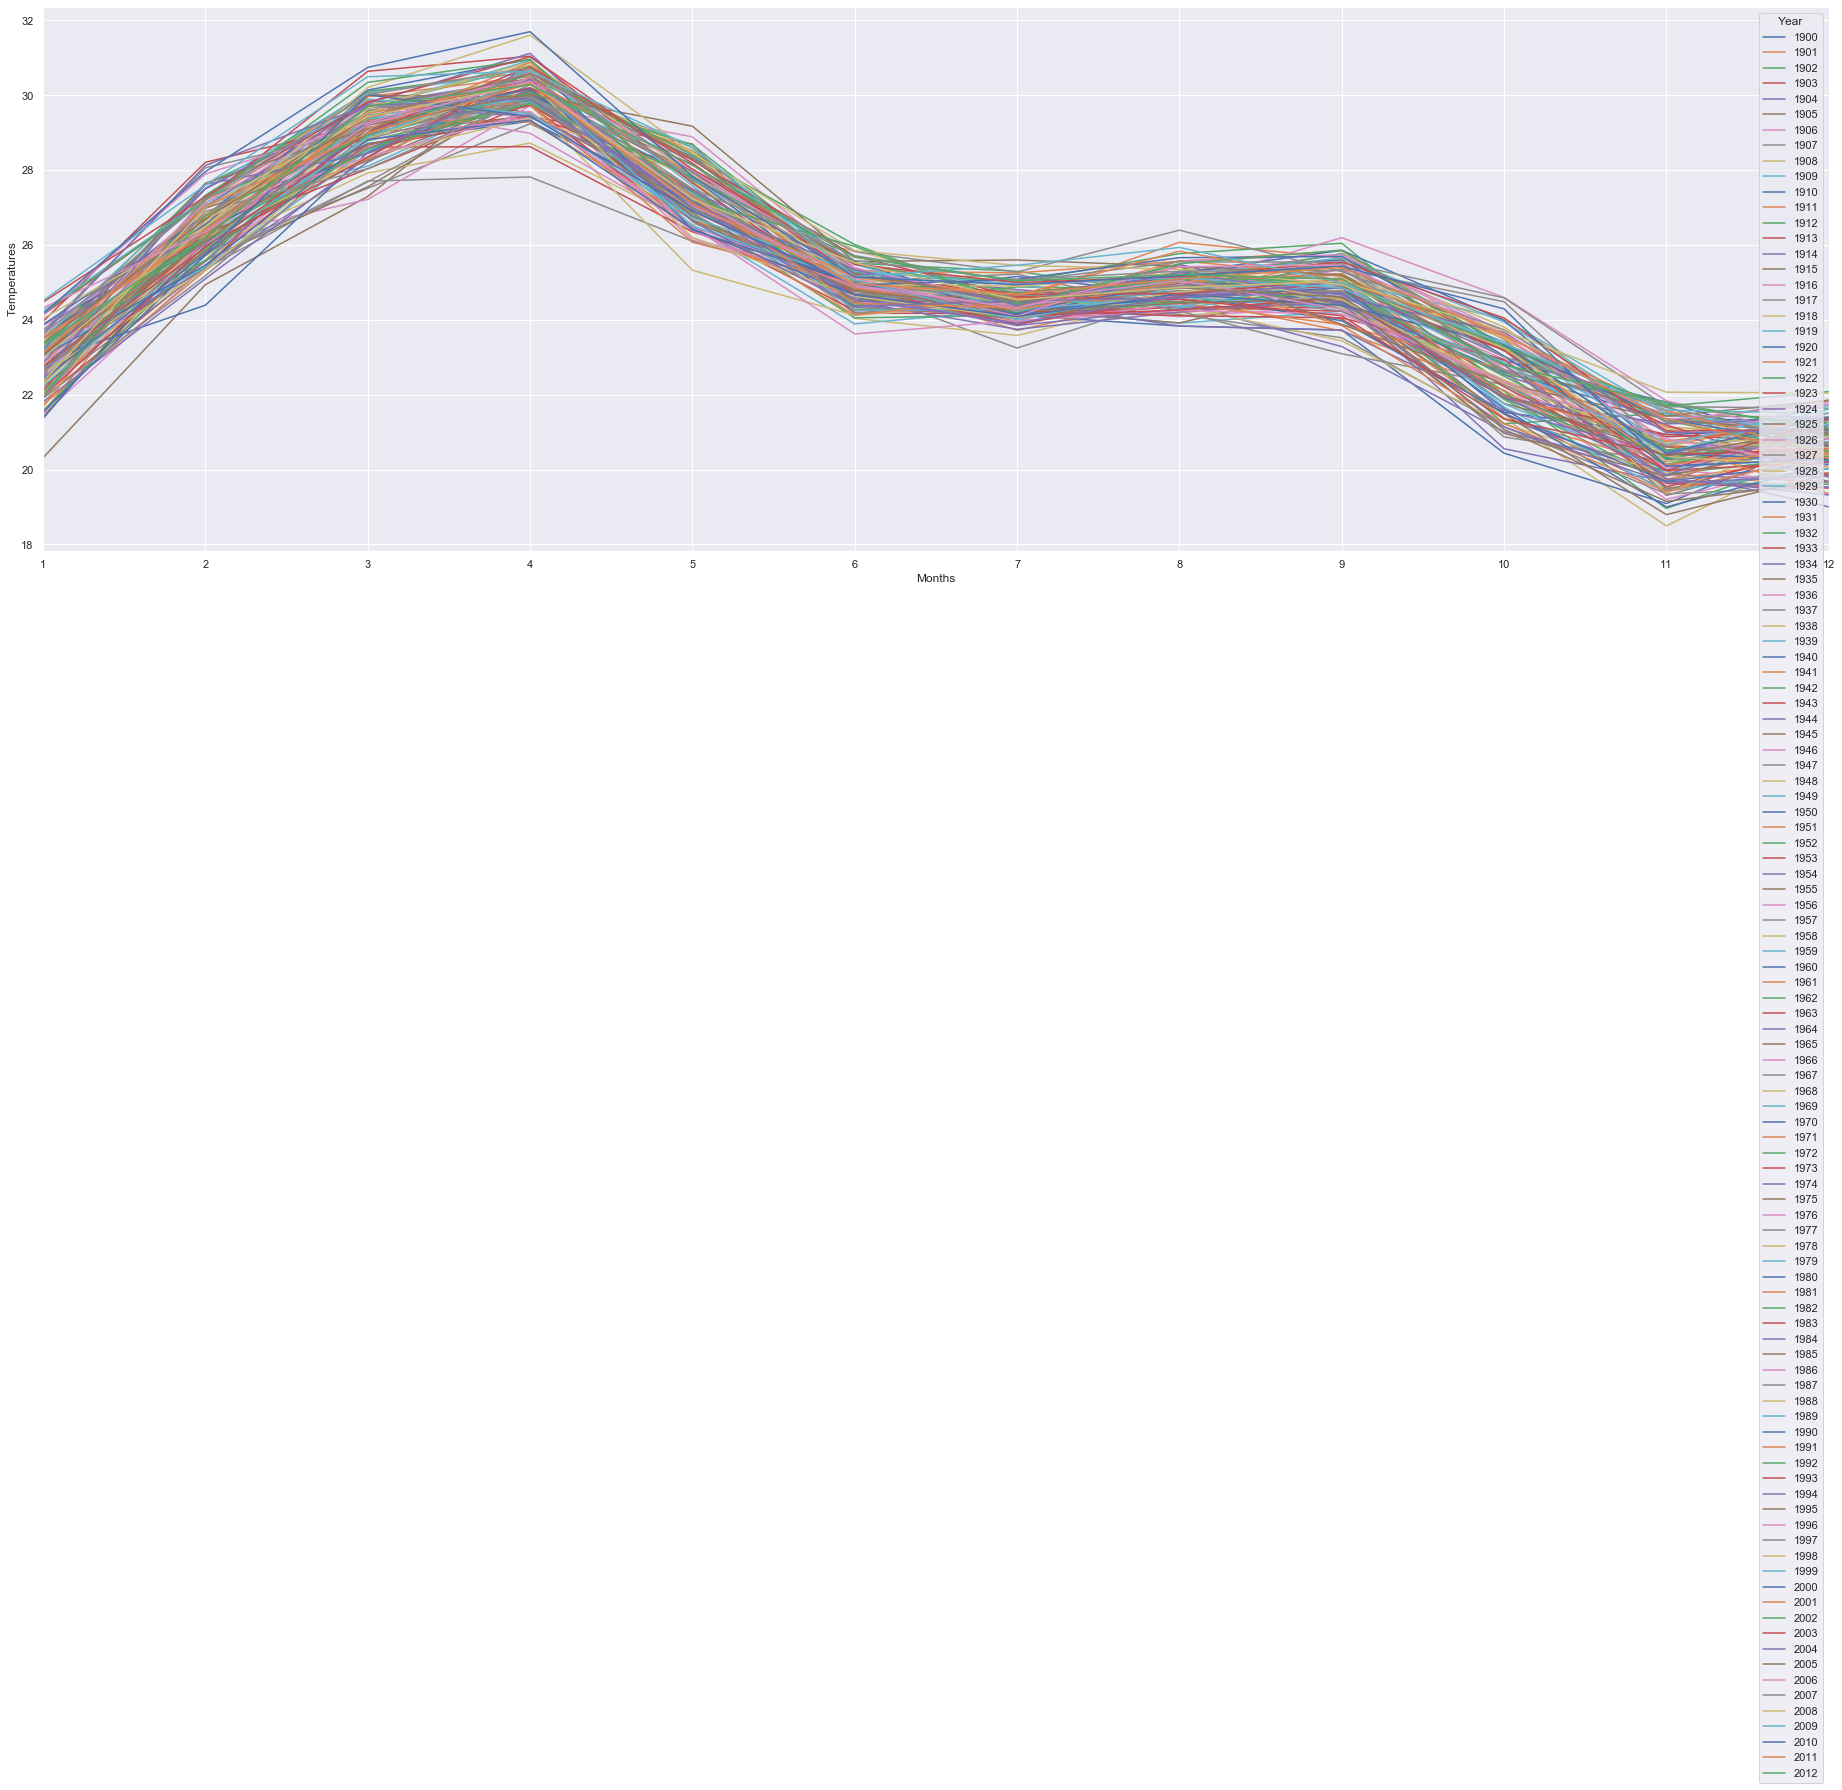

In [189]:
sarimapunepivot.plot(figsize=(32,10))
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.show()

In [190]:
monthlyAvg = sarimapunepivot.mean(axis=1)

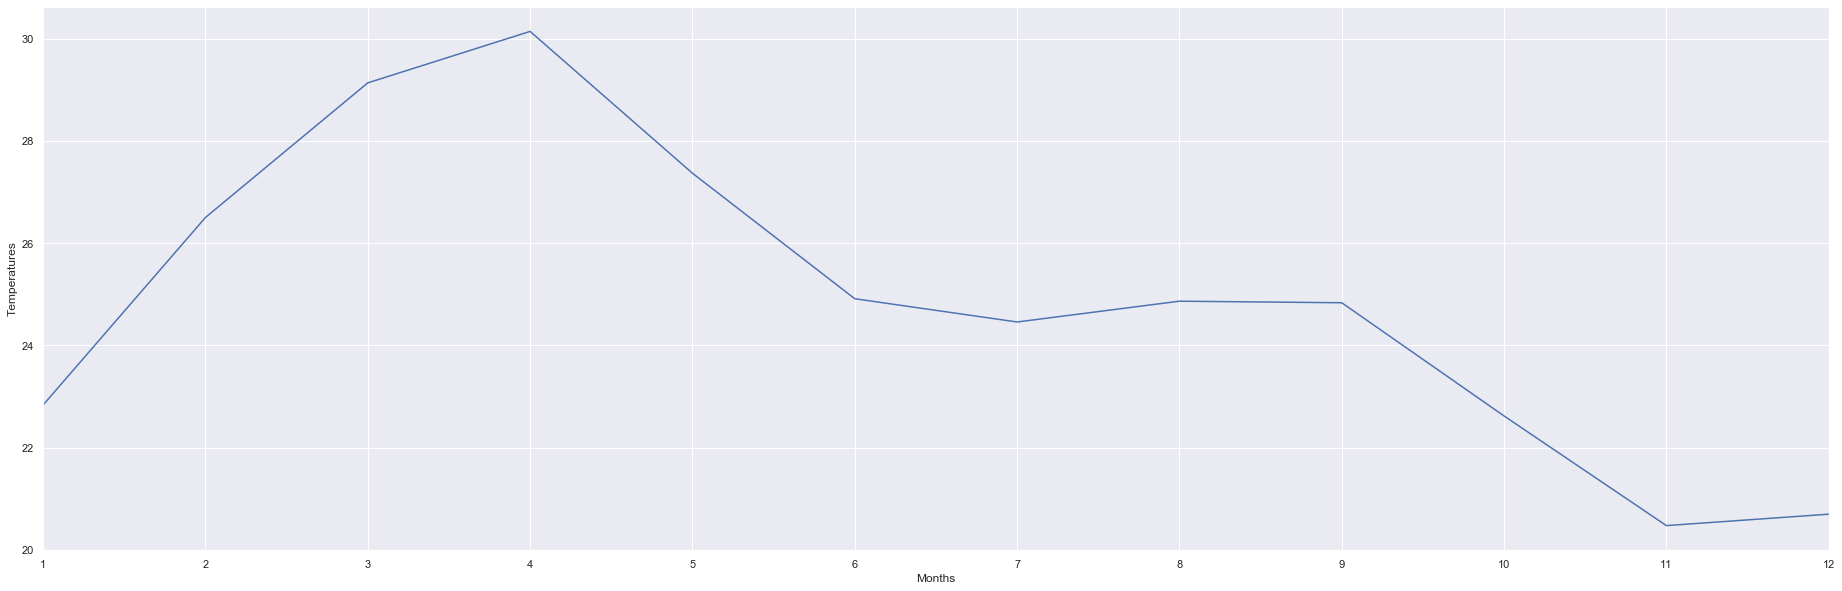

In [191]:
monthlyAvg.plot(figsize=(32,10))
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.show()

The above plot is to generalize the monthly behavior of those many months into a line graph to make immediate inferences

Next, we are going to hunt for any types of trends, which we know of from the earlier plotting and plot a line graph to follow the trend behavior.

In [192]:
yearlyAvg = pd.pivot_table(sarimapune, values='Temp', index='Year', aggfunc = 'mean')
yearlyAvg

,Temp
Year,
1900,25.22
1901,24.89
1902,25.26
1903,24.42
1904,24.60
...,...
2008,25.34
2009,25.82
2010,25.65


In [194]:
yearlyAvg['10 years Moving Average'] = yearlyAvg['Temp'].rolling(10).mean()
yearlyAvg

,Temp,10 years Moving Average
Year,,
1900,25.22,nan
1901,24.89,nan
1902,25.26,nan
1903,24.42,nan
1904,24.60,nan
...,...,...
2008,25.34,25.36
2009,25.82,25.42
2010,25.65,25.47


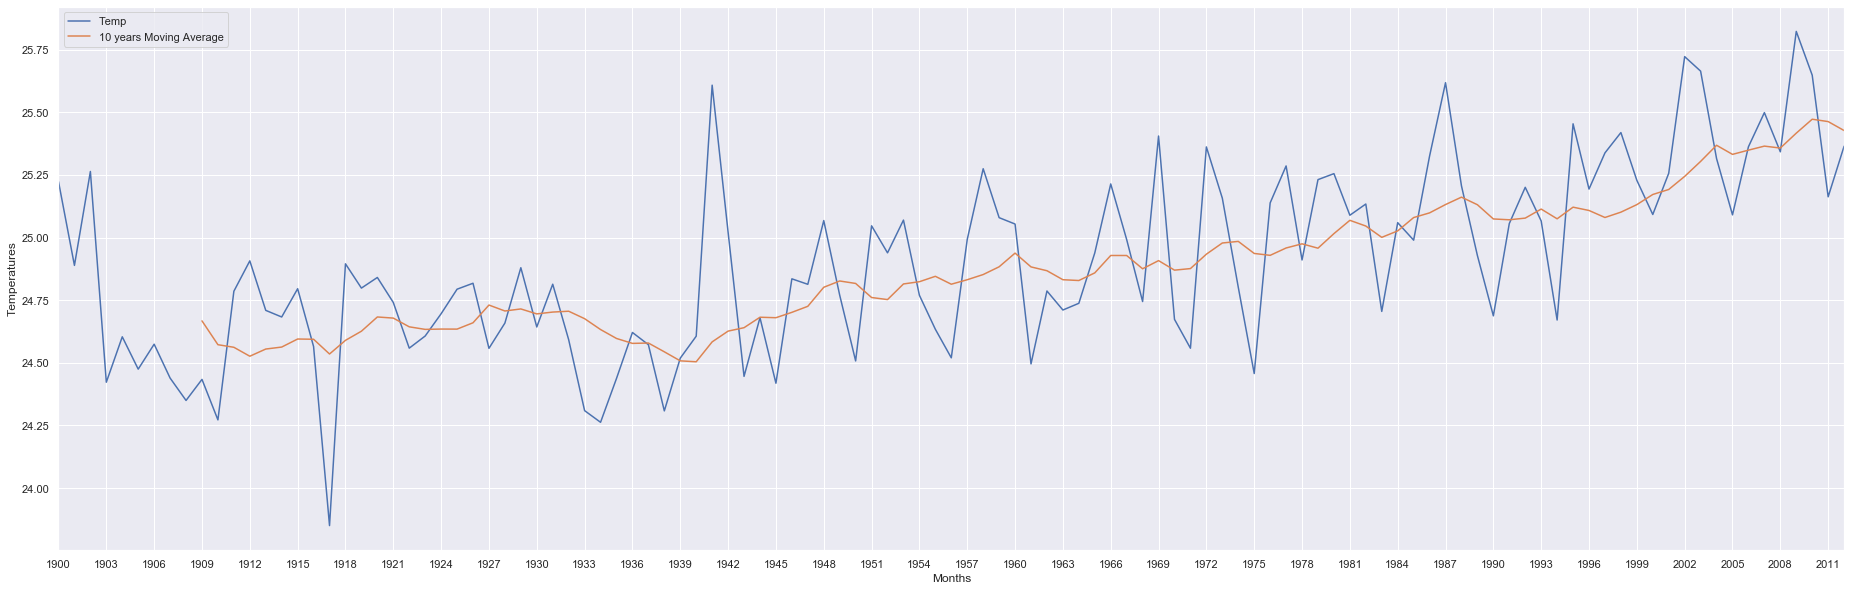

In [195]:
yearlyAvg[['Temp','10 years Moving Average']].plot(figsize=(32,10))
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1900, 2012, 3)])
plt.show()

We can confirm that there is a constant increasing trend and that the average temperature increased from 24.25º to 25.75º, <br>that's a.....

<div align = "center">

# STAGGERING 6.4% temperature rise in over 100 years, definitely a huge rise in surface temperature!!!!

</div>

Before moving on to modelling, we will now split the data in training, validation and test set.<br>
After training the model, we chose to use the last **5 years** to do the data validation and test, being **2 years** to do a month by month validation (walk forward) and **1 year**'s data to make an extrapolation for the future and compare to the test set

In [196]:
trainsarima = sarimapune[:-60].copy()
validsarima = sarimapune[-60:-12].copy()
testsarima = sarimapune[-12:].copy()

In [197]:
validsarima

,Temp,Month,Year
Date,,,
2008-01-31,22.35,1,2008
2008-02-29,27.01,2,2008
2008-03-31,29.43,3,2008
2008-04-30,30.31,4,2008
2008-05-31,27.23,5,2008
...,...,...,...
2011-08-31,25.09,8,2011
2011-09-30,25.40,9,2011
2011-10-31,23.59,10,2011


In [198]:
baseline = validsarima['Temp'].shift()
baseline.dropna(inplace=True)
baseline.head()

Date
2008-02-29   22.35
2008-03-31   27.01
2008-04-30   29.43
2008-05-31   30.31
2008-06-30   27.23
Freq: M, Name: Temp, dtype: float64

### Let's make a baseline for SARIMA predctions

In [199]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values

rmse_base = measure_rmse(validsarima.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} ')

The RMSE of the baseline that we will try to diminish is 2.1565 


As we can see, the series has a considerable amount of uptrend and it appears that there is some seasonality with higher temperatures at the begining and as we approach towards the end of the year, the temperature keeps lowering.

### Stationarity check

In [210]:
def checkStationary(y, lags_plots=48, figsize=(32,10)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Pune Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = round(value,4)
        
    print(adftest)
    
    if adftest[0].round(4) < adftest[5].round(4):
        print("\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series is stationary")
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                  -3.83
p-value                          0.00
Lags Used                       23.00
Number of Observations Used   1272.00
Critical Value (1%)             -3.44
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series is stationary


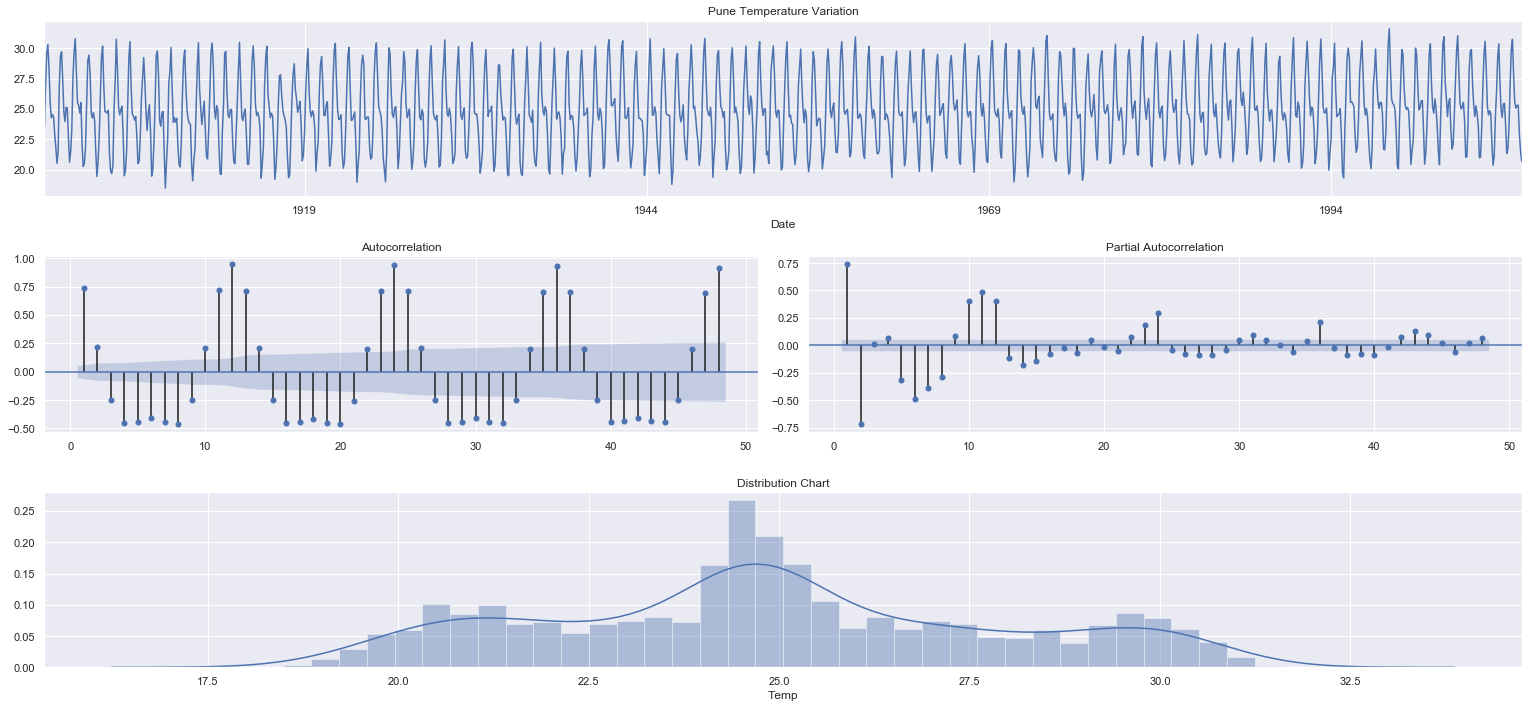

In [211]:
checkStationary(trainsarima['Temp'])

Inferences from Autocorrelation : 

Reading from the partial autocorrelation, the lags towards the start have a high relation as the temperature ranges from a high count towards the start of the year and lowers down towards the middle of year which consistently lowers towards the end of the year. The trend in autocorrelation depeicts the same.

From lag **12** and sequentially from every **12** lags there is a significant positive autocorrelation. The PACF shows a positive spike in the first lag and a drop to negative PACF in the following lags.

This behavior between the Autocorrelation and Partial Autocorrelation plots suggests an **AR(1)** model and also a first seasonal difference ( Yt−Yt−12 ). Let's plot the stationarity function again with the first seasonal difference to see if we will need some SAR(P) or SMA(Q) parameter:

Results of Dickey-Fuller Test:
Test Statistic                 -12.61
p-value                          0.00
Lags Used                       23.00
Number of Observations Used   1260.00
Critical Value (1%)             -3.44
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series is stationary


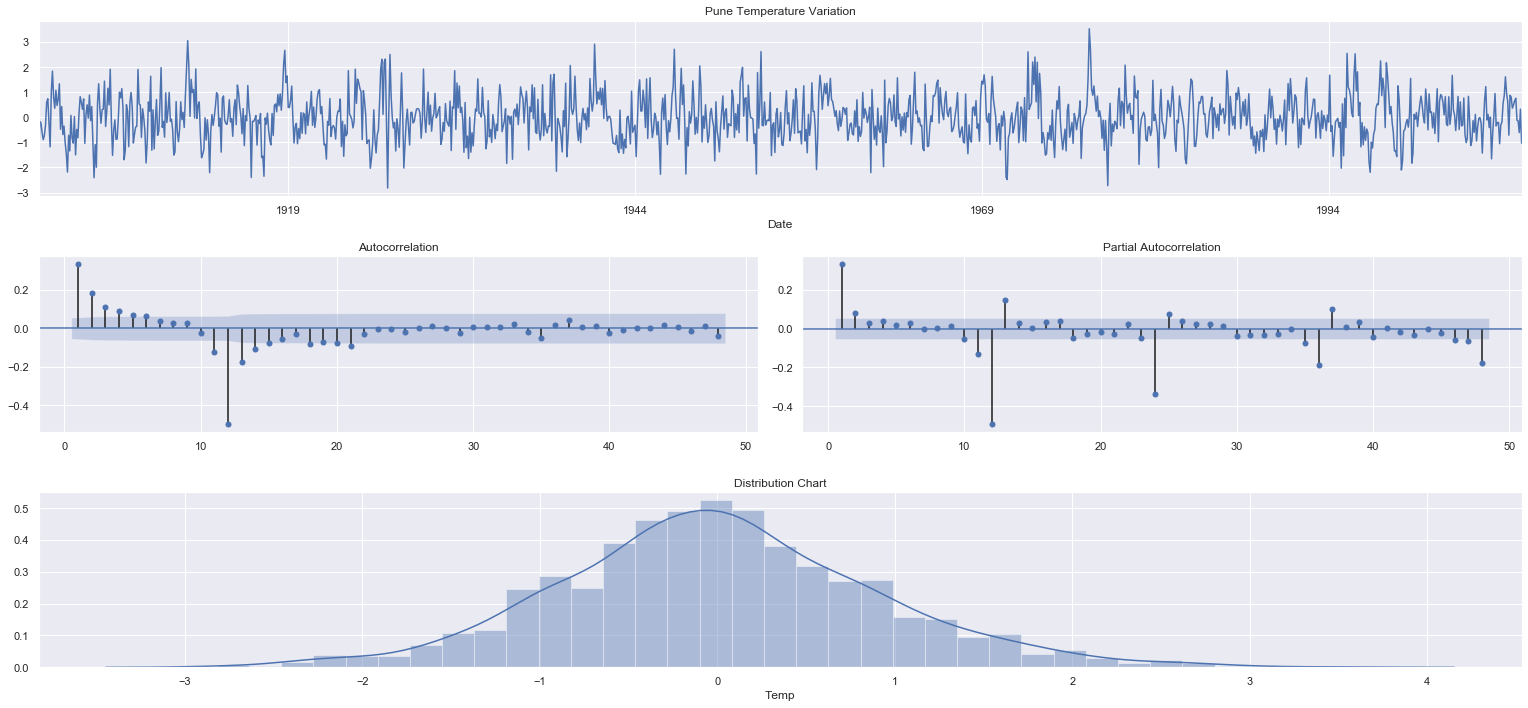

In [212]:
checkStationary(trainsarima['Temp'].diff(12).dropna())

The autocorrelation shows a gradual decay with the first seasonal difference.
Something also worth noticing is that the the partial autocorrelation's 3rd lag has fallen below the confidence interval. This is an AR signature with a parameter of 2, so this is an **AR(2)** model.

As we used a first seasonal difference, the autocorrelation and Partial autocorrelation showed a significative drop in the 12th lag, it means an Seasonal Moving Average(SMA) signature with a parameter of 1 lag, resuming this is an Seasonal AutoRegression **SAR(1) with a first difference**.

Initially we will start off with the following **(p,d,q)** orders: **(2, 0, 0)** and with the following seasonal **(P, D, Q, S)** orders **(0,1,1,12)** and as the series has a clear uptrend i'm going to use it in the model **c**.

You can reference the meaning for each parameters in the explanations above

Next, we'll write a function that does a 1 step forward forecast and then analyze it's errors : 

In [213]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [214]:
validsarima['Pred'] = walk_forward(trainsarima['Temp'], validsarima['Temp'], ((2,0,0),(0,1,1,12),'c'))

In [215]:
rmse_pred = measure_rmse(validsarima['Temp'], validsarima['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} ")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.5478 
It's a decrease of -74.6% in the RMSE


<b>The Seasonal ARIMA model works significantly well, that's a significant reduction in errors! </b>

In [216]:
validsarima['Error'] = validsarima['Temp'] - validsarima['Pred']

It's always important to check the residuals, Below is a function to plot some important charts to help us visualize the residuals.

To visualize this, we will make the following plots :

1. Current and Predicted values through the time.
2. Residuals vs Predicted values in an scatterplot.
3. QQ Plot showing the distribution of errors and its ideal distribution
4. Autocorrelation plot of the Residuals to see if there is some correlation left.

In [217]:
def plotError(data, figsize=(32,10)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [218]:
validsarima

,Temp,Month,Year,Pred,Error
Date,,,,,
2008-01-31,22.35,1,2008,23.25,-0.90
2008-02-29,27.01,2,2008,26.53,0.48
2008-03-31,29.43,3,2008,29.44,-0.01
2008-04-30,30.31,4,2008,30.46,-0.15
2008-05-31,27.23,5,2008,27.59,-0.36
...,...,...,...,...,...
2011-08-31,25.09,8,2011,25.22,-0.12
2011-09-30,25.40,9,2011,25.13,0.27
2011-10-31,23.59,10,2011,23.22,0.38


In [219]:
del validsarima['Month']

In [220]:
del validsarima['Year']

In [221]:
validsarima.head()

,Temp,Pred,Error
Date,,,
2008-01-31,22.35,23.25,-0.90
2008-02-29,27.01,26.53,0.48
2008-03-31,29.43,29.44,-0.01
2008-04-30,30.31,30.46,-0.15
2008-05-31,27.23,27.59,-0.36


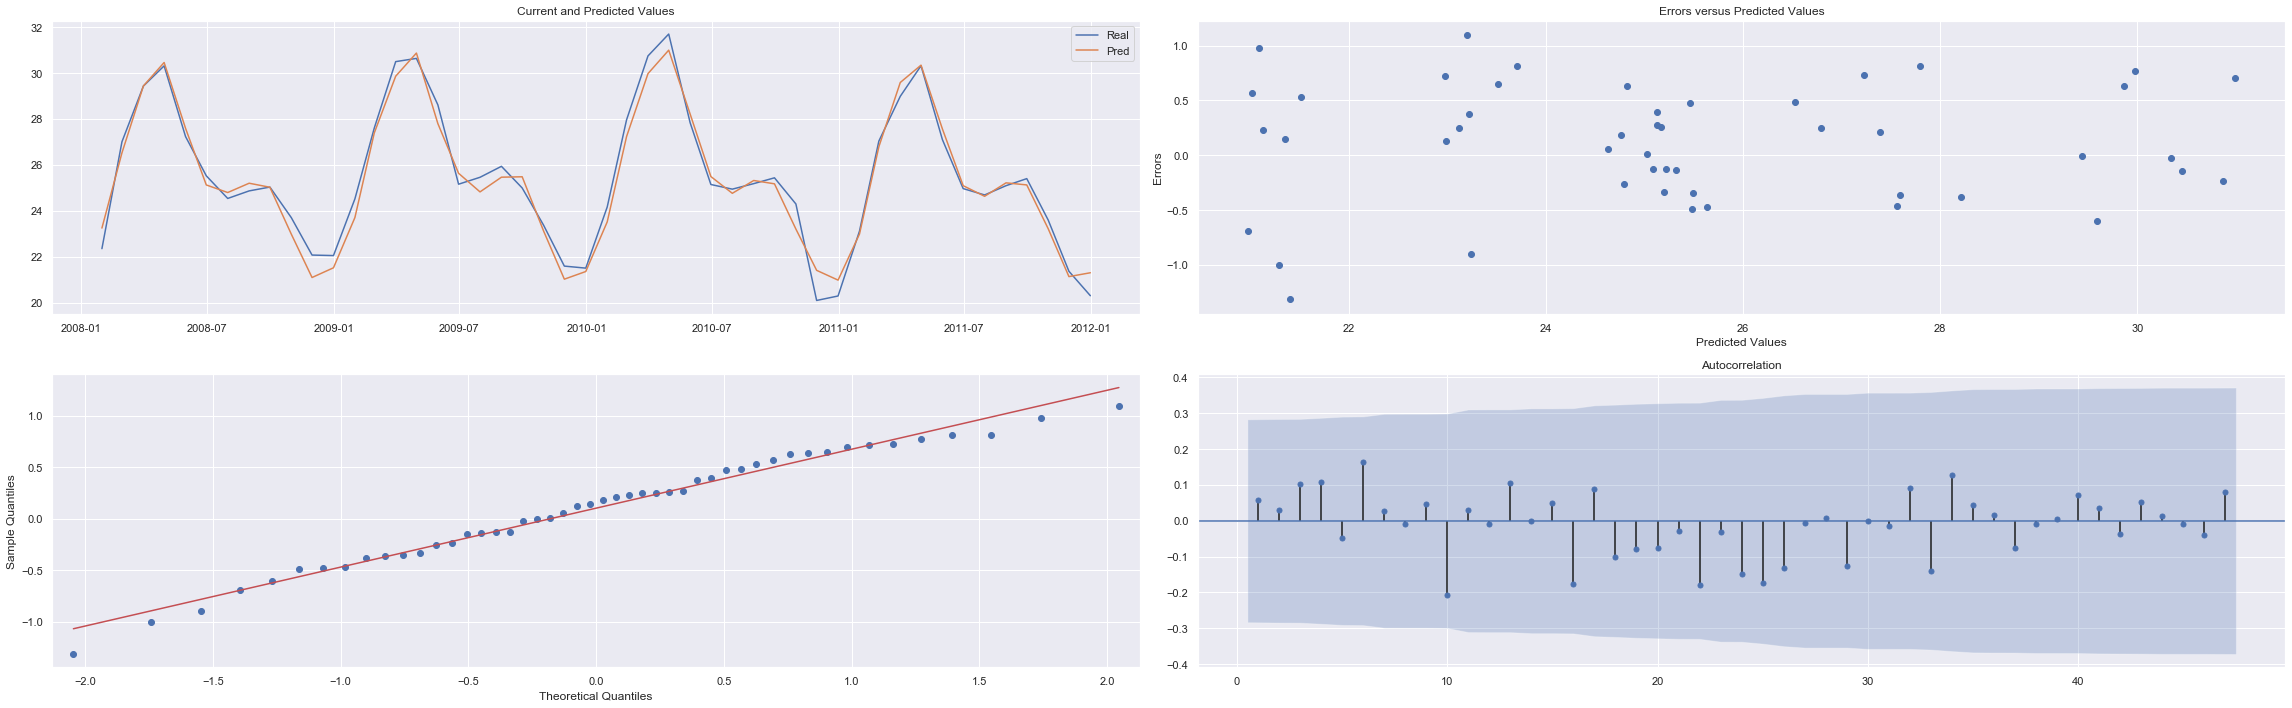

In [222]:
plotError(validsarima)

Analyzing the plots above we can see that the predictions fit very well on the current values!!!

* The actual vs predicted values fit really well for a large volume of data
* Scatter plot for error vs predicted values has no trend
* QQ shows perfect alignment with the actual values
* Autocorrelation shows no lag going outside the confidence interval



# Finally,

We will now extrapolate the prediction in the test set for the last year as per the data

In [223]:
future = pd.concat([trainsarima['Temp'], validsarima['Temp']])
future.head()

Date
1900-01-31   23.52
1900-02-28   26.98
1900-03-31   29.55
1900-04-30   30.31
1900-05-31   28.36
Name: Temp, dtype: float64

In [224]:
model = sm.tsa.statespace.SARIMAX(future, order=(2,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

As the newly predicted values are ready, we will store it as a new column in our dataframe so that we can use this to compare it with actual data

In [225]:
testsarima['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))

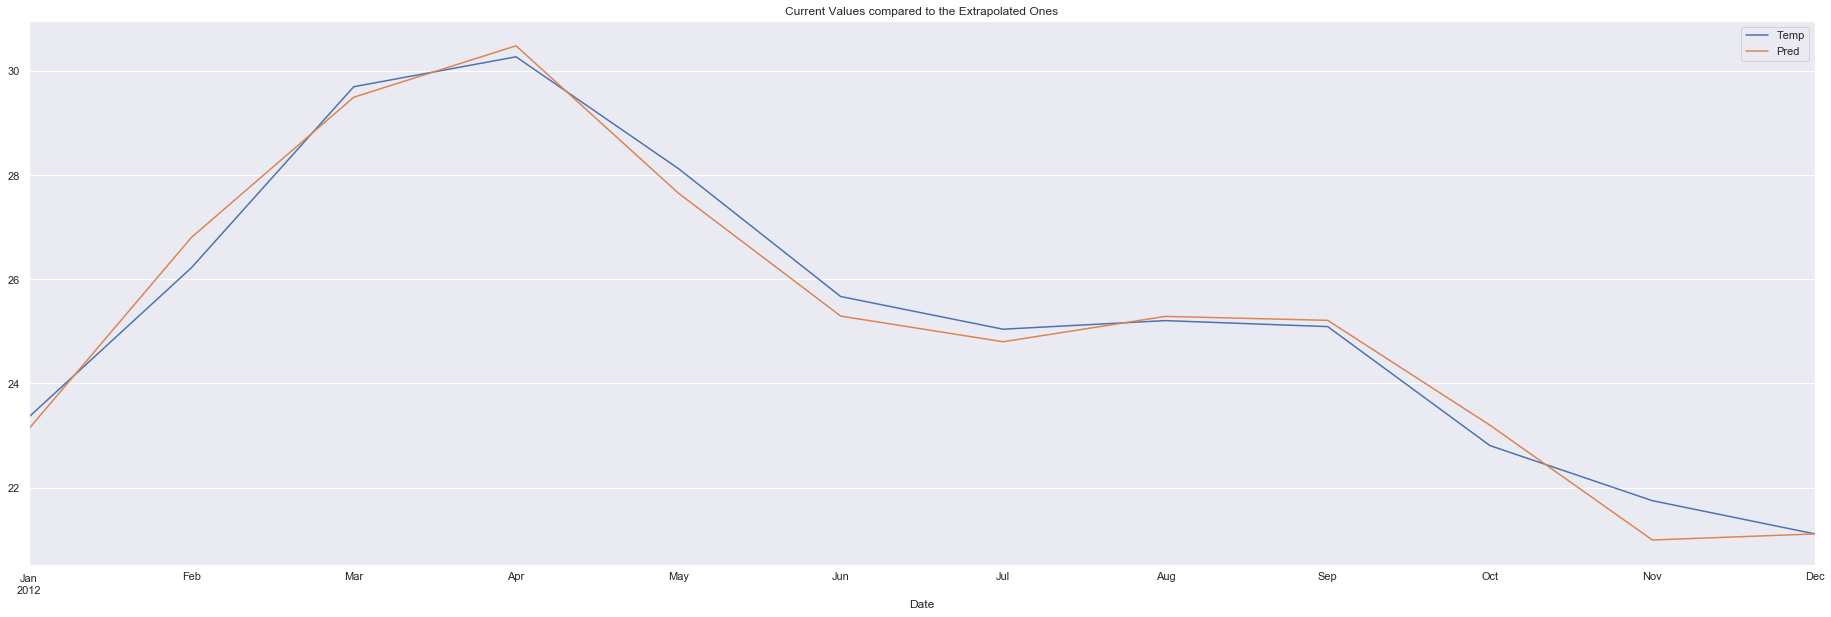

In [226]:
testsarima[['Temp', 'Pred']].plot(figsize=(32,10))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

These SARIMA parameters were well fitted, the predicted values are following the real values and also the seasonal pattern, the closest and best fit yet.

We will now finally evaluate the model with the RMSE in the test set (baseline against the extrapolation):

In [227]:
test_baseline = testsarima['Temp'].shift()

test_baseline[0] = testsarima['Temp'][0]

rmse_test_base = measure_rmse(testsarima['Temp'],test_baseline)
rmse_test_extrap = measure_rmse(testsarima['Temp'], testsarima['Pred'])

print(f'The baseline RMSE for the test baseline was {round(rmse_test_base,2)} celsius degrees')
print(f'The baseline RMSE for the test extrapolation was {round(rmse_test_extrap,2)} celsius degrees')
print(f'That is an improvement of {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

The baseline RMSE for the test baseline was 1.79 celsius degrees
The baseline RMSE for the test extrapolation was 0.37 celsius degrees
That is an improvement of 79.33%


# Conclusion :
<br>
Just over the last 100 years, a 6.4% increase rate for the land temperature is quite alarming. It is quite unfortunate that even with a empirical model that shows we are progressing towards the worse, there are some influential leaders as well as quite some population who do not believe or care about the climate change! Countries, all over the world, should do what it takes to reduce the rate at which it is increasing